In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from imports import *

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import helper

In [5]:
WILD_TYPE_ORIGINALS = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired/'
NINA_D1_ORIGINALS = '/raid/mpsych/RISTERLAB/NINA_D1_MUTANT/VSOverviewTileSet/Acquired/'

In [6]:
WILD_TYPE_RAW = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/wild_type_raw/'
NINA_D1_RAW = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/nina_d1_raw/'

In [7]:
helper.check(WILD_TYPE_RAW)
helper.check(NINA_D1_RAW)

In [8]:
DATA_DIR = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-13/'

In [9]:
helper.check(DATA_DIR)

In [10]:
DATA_DIR_WILD_TYPE = DATA_DIR + 'wild_type/'
DATA_DIR_NINA_D1 = DATA_DIR + 'nina_d1/'

In [11]:
helper.check(DATA_DIR_WILD_TYPE)
helper.check(DATA_DIR_NINA_D1)

In [12]:
WILD_TYPE_NORM = DATA_DIR_WILD_TYPE + 'norm/'
NINA_D1_NORM = DATA_DIR_NINA_D1 + 'norm/'

In [13]:
helper.check(WILD_TYPE_NORM)
helper.check(NINA_D1_NORM)

In [14]:
WILD_TYPE_NORM_NPY_PATH = os.path.join(WILD_TYPE_NORM, 'wild_type_norm.npy')
NINA_D1_NORM_NPY_PATH = os.path.join(NINA_D1_NORM, 'nina_d1_norm.npy')

In [15]:
wild_type_norm_imgs = np.load(WILD_TYPE_NORM_NPY_PATH)
nina_d1_norm_imgs = np.load(NINA_D1_NORM_NPY_PATH)

KeyboardInterrupt: 

In [16]:
wild_type_norm_imgs.shape
nina_d1_norm_imgs.shape

(300, 4096, 6144)

In [17]:
def center_crop(x_og, y_og, x_new, y_new):
    left = int((x_og - x_new)/2)
    top = int((y_og - y_new)/2)
    right = int((x_og + x_new)/2)
    bottom = int((y_og + y_new)/2)
    
    return left, top, right, bottom

In [15]:
WILD_TYPE_CROP = DATA_DIR_WILD_TYPE + 'crop/'
NINA_D1_CROP = DATA_DIR_NINA_D1 + 'crop/'

helper.check(WILD_TYPE_CROP)
helper.check(NINA_D1_CROP)

WILD_TYPE_CROP_NPY_PATH = os.path.join(WILD_TYPE_CROP, 'wild_type_crop_1500_2000.npy')
NINA_D1_CROP_NPY_PATH = os.path.join(NINA_D1_CROP, 'nina_d1_crop_1500_2000.npy')

In [19]:
crop_imgs = []
i = 1

x, y = wild_type_norm_imgs.shape[1], wild_type_norm_imgs.shape[2]
x_new, y_new = 1500, 2000
left, top, right, bottom = center_crop(x, y, x_new, y_new)

for img in tqdm(wild_type_norm_imgs):
    img = img[left:right, top:bottom]
    crop_imgs.append(img)
    mh.imsave(os.path.join(WILD_TYPE_CROP, str(i) + '.tif'), img)
    i = i + 1
np.save(WILD_TYPE_CROP_NPY_PATH, crop_imgs)

  0%|          | 0/300 [00:00<?, ?it/s]

In [20]:
crop_imgs = []
i = 1

x, y = nina_d1_norm_imgs.shape[1], nina_d1_norm_imgs.shape[2]
x_new, y_new = 1500, 2000
left, top, right, bottom = center_crop(x, y, x_new, y_new)

for img in tqdm(nina_d1_norm_imgs):
    img = img[left:right, top:bottom]
    crop_imgs.append(img)
    mh.imsave(os.path.join(NINA_D1_CROP, str(i) + '.tif'), img)
    i = i + 1
np.save(NINA_D1_CROP_NPY_PATH, crop_imgs)

  0%|          | 0/300 [00:00<?, ?it/s]

In [16]:
wild_type_crop_imgs = np.load(WILD_TYPE_CROP_NPY_PATH)
nina_d1_crop_imgs = np.load(NINA_D1_CROP_NPY_PATH)

In [17]:
wild_type_crop_imgs.shape

(300, 1500, 2000)

In [157]:
img = wild_type_crop_imgs[130].copy()

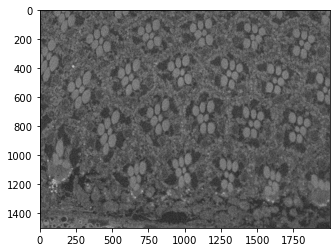

In [158]:
plt.figure()
plt.imshow(img, cmap='gray')

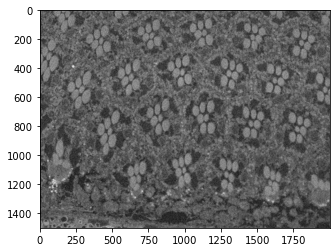

In [159]:
# Apply a Gaussian filter to the image
img = mh.gaussian_filter(img, sigma=1)
plt.figure()
plt.imshow(img, cmap='gray')

In [160]:
img = img/img.max()
img = img * 255
img = img.astype(np.uint8)

In [161]:
img.max(), img.min(), img.mean()

(255, 21, 106.03606066666667)

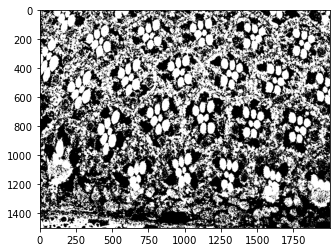

In [162]:
img = (img > img.mean())
plt.figure()
plt.imshow(img, cmap='gray')

In [163]:
labeled, number = mh.label(img)
labeled = mh.labeled.remove_bordering(labeled)

In [164]:
sizes = mh.labeled.labeled_size(labeled)

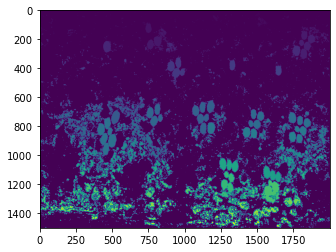

In [156]:
too_large = np.where(sizes > 20500)
labeled_only_big = mh.labeled.remove_regions(labeled, too_large)
plt.figure()
plt.imshow(labeled_only_big)

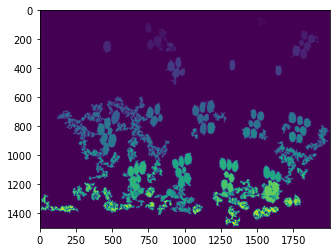

In [165]:
too_small = np.where(sizes < 1500)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)
plt.figure()
plt.imshow(labeled_only_big)

In [166]:
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1
labeled, number_1 = mh.label(binary_mask)

In [167]:
number_1

74

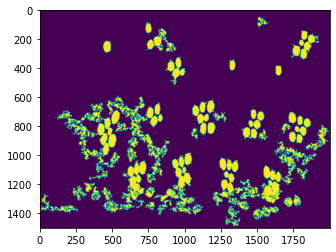

In [169]:
plt.figure()
plt.imshow(binary_mask)

In [170]:
binary_mask_closed = mh.morph.close(binary_mask)

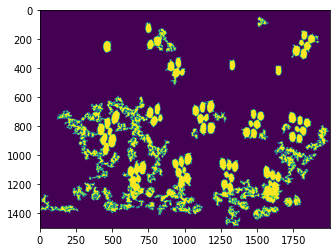

In [171]:
plt.figure()
plt.imshow(binary_mask_closed)

In [173]:
from skimage import measure, filters

region_sizes = measure.regionprops(labeled, intensity_image=binary_mask_closed)

/home/kunal.jain001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [177]:
for region in region_sizes:
    if (region.area > 3000):
        print(region.area)

8891
9117
3468
3312
10286
14862
3578
12160
7161
10568
6015
3197
16837
18828
3448
7052
5636
5632
7635
6269
3305
32637
15167
8037
23609
12082
6548
13601
3198
4118
4013
6613


In [ ]:
region_

In [ ]:
import time
from skimage import measure, filters

success_count=0 
for z in tqdm(wild_type_crop_imgs):
    q = 1
    img = z
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')

    helper.starttime()
    b = img.copy()
    
    # Apply a Gaussian filter to the image
    b = mh.gaussian_filter(b, sigma=1)
    plt.figure(figsize=(5,5))
    plt.imshow(b, cmap='gray')

    # Thresholding using mean value of pixel intensities
    # Update this with a flag for otsu and mean
    b = b/b.max()
    b = b * 255
    b = b.astype(np.uint8)
    b = (b > b.mean())
    plt.figure(figsize=(5,5))
    plt.imshow(b, cmap='gray')
    
    # Label the regions in the filtered image
    labeled, number = mh.label(b)


    # filter based on labeled region size
    sizes = mh.labeled.labeled_size(labeled)

    # Remove the regions that are less than 1000
    too_small = np.where(sizes < 1500)
    labeled_only_big = mh.labeled.remove_regions(labeled, too_small)


    # Create a binary mask from the filtered labeled regions
    binary_mask = labeled_only_big.copy()
    binary_mask[binary_mask > 0] = 1
    labeled, number_1 = mh.label(binary_mask)
    
    print(number_1)
    plt.figure(figsize=(5,5))
    plt.imshow(binary_mask)
    
    # Close the regions in the binary mask
    binary_mask_closed = mh.morph.close(binary_mask)
    
    # plt.figure(figsize=(10,10))
    # plt.imshow(binary_mask_closed)
    # plt.show() 

    # Set a threshold for the minimum region size           
    min_region_size = 3000

    # Initialize a variable to count the number of regions above the minimum size
    large_regions = 0

    # Get the sizes of the labeled regions
    region_sizes = measure.regionprops(labeled, intensity_image=binary_mask_closed)

    # Iterate over the region sizes and count the number of large regions
    for region in region_sizes:
        if region.area > min_region_size:
             large_regions += 1


    threshold = filters.threshold_otsu(binary_mask_closed) 
    binary_image = binary_mask_closed > threshold
    print('time taken for iteration ', q,' is:')
    helper.endtime()
#             if number_1>= 90:                
#                 print (z)
#                 plt.imshow(binary_image)
#                 plt.show()
#                 print (number_1)
#                 print (threshold)
#                 print(large_regions)

    if number_1 <=100 and number_1 >=50:
        print(large_regions)
        if large_regions <=30:       # 20 is ideal value 
            print ("######################################################################")
            #plt.figure(figsize=(10,10))
            print("The image has clear segmentation.")
            plt.figure(figsize=(5,5))
            plt.imshow(binary_image)
            #plt.show()
            print (number_1)
            print (threshold)
            print(large_regions)
#             shutil.move(os.path.join(normalized,z),os.path.join(originals,z))                 
#             shutil.move(os.path.join(cropped,z),os.path.join(masks,z))                 
#             mh.imsave(os.path.join(masks,z),binary_image)                 
            #print (sizes)
            print ("######################################################################")
            success_count+=1
            print (success_count)
            break
    print ("######################################################################")
print (success_count)
print ('######################################### DONE        ############################################')